In [114]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

# 1D_Ising Model (With configurations)
### Please input the number of spins(0-22)

In [115]:
num_spins=20

### define the energy of 1D Ising model with periocid boundaries, combination function, factorial function

In [116]:
def Ising_1D_Energy(state):
    J=1
    n = len(state)
    energy = 0.0
    
    for i in range(n): # start from 0-4
        
        value_i = state[i]  # 1 or -1
        # set the value of spin i+1, make sure to test if i+1<num_spins, and otherwise account for periodic boundaries
        
        j = (i+1)%n                       # when i=9,i+1=10, 10%10=0
        value_j = state[j]               # the last one=the first one, periodic boundaries
        energy = energy - J * (value_i * value_j) 
        
    return energy

# define factorial function

def factorial(m):
    a=1
    for i in range(1,m + 1):
        a = a*i
    return a

# define combinatorial number function

def num_conf(m,n):
    a=factorial(m)/(factorial(m-n)*factorial(n))
    a=int(a)
    return a

### produce 3D list to store 


In [117]:
start_state_1 = -1*np.ones(num_spins)
initial_energy=Ising_1D_Energy(start_state_1)
energy_list=[]

print("The initial state is ", start_state_1)
print("The initial energy of start state is ", initial_energy)
state_th=[[0] for i in range(num_spins)]

num_new_states=0
energy_list=[]
state_th=[[0] for i in range(num_spins)]
#print("create a list to store new configurations ",state_th) # In this example, for each new configuration, there is only one spin flips from -1 to 1.


for i in range(num_spins): # i: 0-9
    start_state_1 = -1*np.ones(num_spins) # initialization
    #print("i=",i)
    start_state_1[i] *= -1 # the spin flips from -1 to 1 
    
    state_th[i]=start_state_1.tolist()
    
    energy_list.append(Ising_1D_Energy(start_state_1))
    
    #print("The new configuration of changed state is ",start_state_1)
    #print("The new energy of changed state is ", Ising_1D_Energy(start_state_1))
    
#print('\n')
#print('create a list to store all possible configurations:')
#print(state_th)

num_new_states=len(energy_list) # the number of energy equals to the number of new configurations
#print('\n')
#print("The number of all possible configurations is", num_new_states)
#print('\n')
#print("The energy of all the possible configurations are",energy_list)

state_th1=[[] for i in range(num_spins)]
state_th1[0]=state_th
state_th1

The initial state is  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
The initial energy of start state is  -20.0


[[[1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0],
  [-1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
  

### state_th1 is a 3D list. Assume there are n spins.
### The first dimension is the number of spins
### The second dimension is the number of possible configurations at different level. For example, when we flip 1 spin, it's level-1, and there are n possible configurations. If we flip 2 spins, it's level-2, and there are num_conf(n,2) possible configurations(combination function, choose 2 from n) 
### The third dimension is the value of each spin(1 or -1). 
### For example, state_th1[0][0][0]== 1, state_th1[0][0][1]== -1, state_th1[0][1]= [-1.0, 1.0, -1.0, -1.0, -1.0]
### In the following parts, we need to find all the possible configurations under a certain number of spins flipped.

In [118]:
for num_for in range(1,num_spins+1):
    # num_for: 1, 2, 3, 4, 5
    #i=1
    #k=0
    q=0
    
    # if q==factorial(num_spins)/(factorial(num_spins-num_for)*factorial(num_for))-1: # for=1, ==5,  for=2, ==10, for =3, ==10, for=4, ==5, for =5, ==1
    # num_for=1
    
    while q!= num_conf(num_spins,num_for): 
        
        # q: number of possible configurations
        # num_ for ==1, num_conf ==5, if there is only one spin to be flipped, there are 5 possible configurations
        # num_for  ==2, num_conf ==10 , if there are 2 spins to be flipped, there are 10 possible configurations
        # num_ for ==3, num_conf ==10,   if there are 3 spins to be flipped, there are 10 possible configurations
        # num_ for ==4, num_conf ==5,  if there are 4 spins to be flipped, there are 5 possible configurations
        # num_ for ==5, num_conf ==1,  if there are 5 spins to be flipped, there is onlt one possible configuration
    
        
        if (q+num_for)<num_spins: # q=4, 4+2=6
            
            #print("state_th1[num_for-1][q]=")
            #print("state_th1[", num_for-1,"][",q,"]=", state_th1[num_for-1][q])
            
            #  from right to left, count how many spins are "-1" , untill the spin is "1"
            #  for example, if the list is: [1, -1, -1, -1, -1]
            #  from right to left, there are four "-1", so we have 4 copies of  [1, -1, -1, -1, -1]
            #  we want to achieve different flip for each copy like this:
            # [1, 1, -1, -1, -1]
            # [1, -1, 1, -1, -1]
            # [1, -1, -1, 1, -1]
            # [1, -1, -1, -1, 1]  
            
            # find the number of copies
            copy=0
            for p in range(num_spins-1,-1,-1):
                if  state_th1[num_for-1][q][p]!=1:
                    copy=copy+1
                else:
                    break
            #print( "number of copies = ", copy)
            #print( "num_for-1 = ", num_for-1)
            #print( "q= ", q)
            #print("state_th1[num_for-1][q]=",state_th1[num_for-1][q])
            #  make some copies to be flipped
            
            
            conf_th=[]
            for co in range(copy): #copy=1, co=0
                conf_th.append(state_th1[num_for-1][q].copy())
             
            e=0
            # start from the element that isn't "1" in the list
            for n in range(q+num_for, num_spins): # q=0,n=1,2,3,4
                conf_th[e][n]*=-1  # flip each spin in each copy
                state_th1[num_for].append(conf_th[e])  # after flip, append the new configuration to the current list
                #print("after append, state_th1[num_for]=", state_th1[num_for]) # update after append
                e=e+1
            q=q+1
            #print('\n')
        
            # after ergodic step, q=q+1, start from the next one in the second level(there are two spins flipped, and the second level has 10 possible configurations)
        else:
            
      
            copy=0   
            for p in range(num_spins-1,-1,-1):
                if  state_th1[num_for-1][q][p]== -1:
                    copy=copy+1
                else:
                    break

            if copy!=0:
                conf_th=[]
                for x in range(copy+1):
                    conf_th.append(state_th1[num_for-1][q].copy())
                               
                #for co in range(copy): #copy=2, co=0,1
                    #conf_th=copy.copy(state_th1[num_for-1][q])
            
            e=0                   
            for n2 in range(num_spins-1,-1,-1): 
                if conf_th[e][n2]!= 1:
                    conf_th[e][n2]*=-1
                    state_th1[num_for].append(conf_th[e]) # after flip, append the new configuration to the current list
                    #print("after append, state_th1[num_for]=", state_th1[num_for]) # update after append    
                    e=e+1            
                
                else:
                    break
                
            #print('\n')
            q=q+1
        

## The possible configurations

In [119]:
print("num_spins=", num_spins)
print("original state:")

E_totallist=[]

state_th0=[-1 for i in range(num_spins)]
print(state_th0)
energy_list=[0]
energy_list[0]=Ising_1D_Energy(state_th0)

E_totallist.append(energy_list[0])

print("The energy of the original state is",energy_list)
print('\n')

print("If only 1 spin flipped, all the possible configurations are")
print(state_th)
print("The number of permutation of the case: ",num_conf(num_spins,1))
energy_list=[0 for x in range(num_conf(num_spins,1))]
for j in range(num_conf(num_spins,1)):
        energy_list[j]=Ising_1D_Energy(state_th[j])
        E_totallist.append(energy_list[j])
        
print("The energy of all the possible configurations above are",energy_list)
print('\n')

for i in range(num_spins-1): #i=0,1,2,3,4
    print("If", i+2," spins flipped, all the possible configurations are ")
    length=len(state_th1[i+1])
    
    print(state_th1[i+1])
    print("The number of  permutation of the case: ",length)
    
    energy_list=[0 for x in range(length)]
    for j in range(length):
        energy_list[j]=Ising_1D_Energy(state_th1[i+1][j])
        E_totallist.append(energy_list[j])
    print("The energy of all the possible configurations above are",energy_list)
   
    print('\n')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The energy of all the possible configurations above are [-16.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -12.0, -12.0, -8.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The energy of all the possible configurations above are [-16.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -12.0, -12.0, -8.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




The number of  permutation of the case:  184756


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




The number of  permutation of the case:  167960
The energy of all the possible configurations above are [-16.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -12.0, -12.0, -8.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -8.0, -8.0, -4.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -8.0, -8.0, -4.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The energy of all the possible configurations above are [-16.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -12.0, -12.0, -8.0, -12.0, -12.0, -12.0, -16.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -8.0, -8.0, -4.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -8.0, -8.0, -4.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -4.0, -8.0, -8.0, -4.0, -4.0, -8.0, -8.0, -4.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -8.0, -12.0, -8.0, -4.0, -4.0, -8.0, -8.0, -4.0, -8.0, -8.0, -8.0, -12.0, -12.0, -8.0, -8.0, -12.0, -8.0, -4.0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## The energy levels and its degeneracy of all possible configurations

In [120]:
E_totallist2=set(E_totallist)
E_totallist3=list(E_totallist2)
n1=len(E_totallist3)
n2=len(E_totallist)

E_totallist4=[0 for k in range(len(E_totallist3))]

for i in range(n1):
    for j in range(n2):
        if E_totallist[j]==E_totallist3[i]:
            E_totallist4[i]+=1
        else:
            continue               

print("the number of energy level: ", len(E_totallist3))
print("All the possible erengy levels are: ")
print(E_totallist3)
print("The degeneracy of each energy level: ", E_totallist4)

the number of energy level:  11
All the possible erengy levels are: 
[0.0, 4.0, 8.0, -20.0, 12.0, -16.0, 16.0, -12.0, 20.0, -8.0, -4.0]
The degeneracy of each energy level:  [369512, 251940, 77520, 2, 9690, 380, 380, 9690, 2, 77520, 251940]


### Visualization

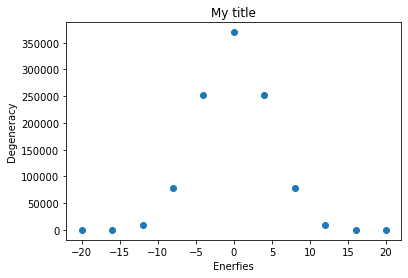

In [121]:
x=E_totallist3
y=E_totallist4
plt.scatter(x, y)
plt.title('My title')
plt.xlabel('Enerfies')
plt.ylabel('Degeneracy')
plt.show()

### The interpolating polynomial for a set of points
#### Constructs a polynomial that passes through a given set of points, then evaluates the polynomial. This function uses a “barycentric interpolation” method that treats the problem as a special case of rational function interpolation. For reasons of numerical stability, this function does not compute the coefficients of the polynomial. This algorithm is quite stable, numerically, but even in a world of exact computation, unless the x coordinates are chosen very carefully. Polynomial interpolation itself is a very ill-conditioned process due to the Runge phenomenon.

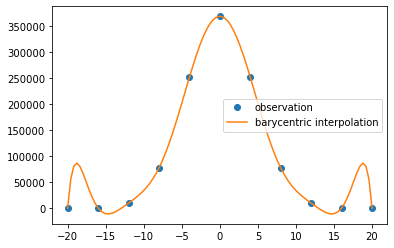

In [122]:
x_array = np.array(x)
y_array = np.array(y)
from scipy.interpolate import barycentric_interpolate

x1 = np.linspace(min(x_array), max(x_array), num=100)
y1 = barycentric_interpolate(x_array, y_array, x1)

plt.plot(x_array, y_array, "o", label="observation")
plt.plot(x1, y1, label="barycentric interpolation")
plt.legend()
plt.show()

# Prediction_1D_Ising Model (No configurations)

### Please input the number of spins(0-200)

num_spins=20

In [124]:
prelist=[]
n=num_spins
prelist.append(-n)
m=int(n/2)+1
c=-n
for i in range(m-1):
    c=c+4
    prelist.append(c)

prelist2=[]
prelist2.append(2)
q=2
while q<=n:
    prelist2.append(num_conf(n,q)*2)
    q=q+2   

    
print("the number of different energies: ",len(prelist))
print("All the different erengies are: ",prelist)
print("The degeneracy of each energy level: ", prelist2)

the number of different energies:  11
All the different erengies are:  [-20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20]
The degeneracy of each energy level:  [2, 380, 9690, 77520, 251940, 369512, 251940, 77520, 9690, 380, 2]


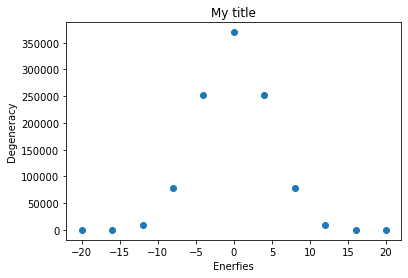

In [125]:
x=prelist
y=prelist2
plt.scatter(x, y)
plt.title('My title')
plt.xlabel('Enerfies')
plt.ylabel('Degeneracy')
plt.show()

### The interpolating polynomial for a set of points
#### Constructs a polynomial that passes through a given set of points, then evaluates the polynomial. This function uses a “barycentric interpolation” method that treats the problem as a special case of rational function interpolation. For reasons of numerical stability, this function does not compute the coefficients of the polynomial. This algorithm is quite stable, numerically, but even in a world of exact computation, unless the x coordinates are chosen very carefully. Polynomial interpolation itself is a very ill-conditioned process due to the Runge phenomenon.

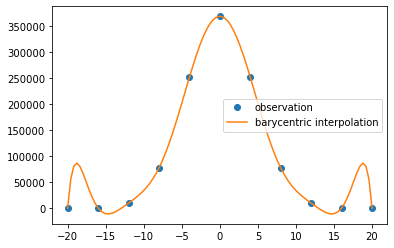

In [126]:
x_array = np.array(x)
y_array = np.array(y)

from scipy.interpolate import barycentric_interpolate

x1 = np.linspace(min(x_array), max(x_array), num=100)
y1 = barycentric_interpolate(x_array, y_array, x1)

plt.plot(x_array, y_array, "o", label="observation")
plt.plot(x1, y1, label="barycentric interpolation")
plt.legend()
plt.show()

#### Convenience function for pchip interpolation. xi and yi are arrays of values used to approximate some function f, with yi = f(xi). The interpolant uses monotonic cubic splines to find the value of new points x and the derivatives there.

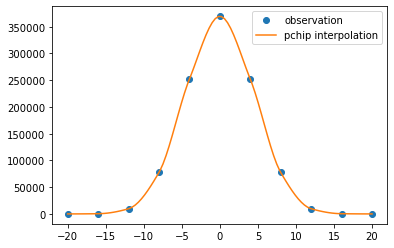

In [127]:
from scipy.interpolate import pchip_interpolate

x2 = np.linspace(min(x_array), max(x_array), num=100)
y2 = pchip_interpolate(x_array, y_array, x2)
plt.plot(x_array, y_array, "o", label="observation")
plt.plot(x2, y2, label="pchip interpolation")
plt.legend()
plt.show()

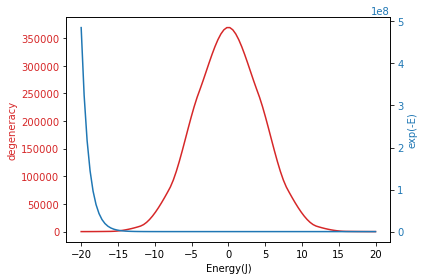

In [128]:
x2 = np.linspace(min(x_array), max(x_array), num=100)
y3 = np.exp(-x2)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Energy(J)')
ax1.set_ylabel('degeneracy', color=color)
ax1.plot(x2, y2, color=color) # the degeneracy of each energy level
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # create the second y-axis for Boltzmann distribution with the same x-axis 
color = 'tab:blue'
ax2.set_ylabel('exp(-E)', color=color)
ax2.plot(x2, y3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
